# High level analysis example via uproot

`uproot` is a python package that allows users to read `ROOT` files without acutally compiling `ROOT`. I believe this is a step up in terms of making the experimental analysis more accessible. This is a very minimal example on how to extract info from a `TTree` object, and how to read the histograms (`TH1`, `TH2`).  

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

## Example on how to read a root tree

In [2]:
# There are two trees in this root files
file = uproot.open("data/test_flat_v3.root")
file.keys()

[b'DataTree;1', b'HeaderTree;1']

In [3]:
# The DataTree has many branches. 
t = file["DataTree"]
t.keys()

[b'fUniqueID',
 b'fBits',
 b'iEventNumber',
 b'iRunNumber',
 b'volumes',
 b'volumes_sName',
 b'volumes_iVolumeID',
 b'volumes_dTotalEnergyDep_keV',
 b'volumes_iTotalOptPhotNumber',
 b'volumes_iTotalThermElecNumber',
 b'primaryParticles',
 b'primaryParticles_sName',
 b'primaryParticles_dPosition_mm_x',
 b'primaryParticles_dPosition_mm_y',
 b'primaryParticles_dPosition_mm_z',
 b'primaryParticles_dDirection_x',
 b'primaryParticles_dDirection_y',
 b'primaryParticles_dDirection_z',
 b'primaryParticles_dEnergy_keV',
 b'primaryParticles_dTime_ns',
 b'primaryParticles_sVolumeName',
 b'primaryParticles_iVolumeID',
 b'tracks',
 b'tracks_sParticleName',
 b'tracks_iParticleID',
 b'tracks_iTrackID',
 b'tracks_iParentID',
 b'tracks_sCreatorProcess',
 b'tracks_dWavelength_nm',
 b'tracks_dCharge',
 b'tracks_steps',
 b'tracks_steps_iStepNumber',
 b'tracks_steps_sProcess',
 b'tracks_steps_sVolumeName',
 b'tracks_steps_iVolumeID',
 b'tracks_steps_dPosition_mm_x',
 b'tracks_steps_dPosition_mm_y',
 b'track

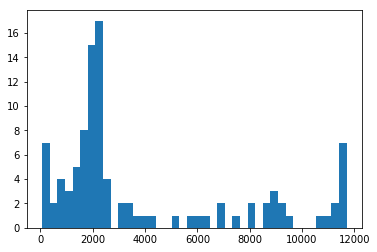

In [4]:
dep_ene =  t["volumes_dTotalEnergyDep_keV"].array()
h = plt.hist(dep_ene.flatten(), 40)

## Example on how to read histogram

In [5]:
h_file = uproot.open("data/All_BG.root")
h_file.keys()

[b'hB8;1',
 b'hhep;1',
 b'hDSN;1',
 b'hatm;1',
 b'hPP;1',
 b'h2vBB;1',
 b'hKr85;1',
 b'hRn222;1',
 b'hRn220;1',
 b'hDetER;1',
 b'hDetNR;1']

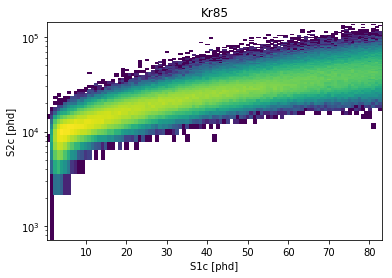

In [6]:
h =  h_file["hKr85"]
xmax = h.xhigh
xmin = h.xlow
ymax = h.yhigh
ymin = h.ylow
nbinx = h.xnumbins
nbiny = h.ynumbins

x = np.linspace(xmin, xmax, nbinx+1)
y = np.linspace(ymin, ymax, nbiny+1)
X, Y = np.meshgrid(0.5*(x[1:]+x[:-1]), 0.5*(y[1:]+y[:-1]))

Z = np.array(h.values)
eps=1e-6
np.seterr(divide='ignore') #ignore log(0) produced warning message
plt.pcolormesh(X,Y,np.log10(Z))
plt.yscale('log')
plt.xlabel('S1c [phd]')
plt.ylabel('S2c [phd]')
plt.title('Kr85')
plt.show()